In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import viz
from matplotlib.colors import LogNorm

colors = viz.color_palette()
cnames_lin = 'green,blue,yellow,purple,red'.split(',')
lin_colors = [colors[c] for c in cnames_lin]

plt.style.use('style.mpl')

# Calculates contingency tables and plots them

Various modes of plotting, e.g. heatmap and bar plot. 

TODO: look for matches in the culture collections. We already know of one. 
https://gcm.wdcm.org/search

In [95]:
summary_df = pd.read_csv('../output/annotree/chemoauto_summary_annotree.csv')
species_results_df = pd.read_csv('../output/annotree/annotree_files/bac120_taxonomy_r95.csv')
genome_metadata = pd.read_csv('../output/annotree/annotree_files/bac120_metadata_r95.csv', low_memory=False)

species_results_df['genome_id'] = species_results_df['gtdbId'].str[3:]
species_results_df['gtdb_order'] = species_results_df['gtdb_order'].str[3:]
genome_metadata['genome_id'] = genome_metadata['accession'].str[3:]


merged = pd.merge(summary_df, genome_metadata, on='genome_id')
summary_annot_df = pd.merge(merged, species_results_df, on='genome_id')
summary_annot_df.genome_id.unique().size

summary_annot_df.to_csv('../output/annotree/chemoauto_summary_annot.csv', index=False)


In [96]:
summary_annot_df.columns.tolist()

['genome_id',
 'fdh',
 'h2ase',
 'meoh',
 'n2ase',
 'bmc',
 'csos2',
 'alpha_csome',
 'csome',
 'rubisco',
 'sbpase',
 'CBB',
 'CBB_csome',
 'CBB_csome_n2ase',
 'CBB_csome_fdh',
 'CBB_csome_h2ase',
 'CBB_csome_fdh_h2ase',
 'accession',
 'ambiguous_bases',
 'checkm_completeness',
 'checkm_contamination',
 'checkm_marker_count',
 'checkm_marker_lineage',
 'checkm_marker_set_count',
 'checkm_strain_heterogeneity',
 'coding_bases',
 'coding_density',
 'contig_count',
 'gc_count',
 'gc_percentage',
 'genome_size',
 'gtdb_genome_representative',
 'gtdb_representative',
 'gtdb_taxonomy',
 'gtdb_type_designation',
 'gtdb_type_designation_sources',
 'gtdb_type_species_of_genus',
 'l50_contigs',
 'l50_scaffolds',
 'longest_contig',
 'longest_scaffold',
 'lsu_23s_contig_len',
 'lsu_23s_count',
 'lsu_23s_length',
 'lsu_23s_query_id',
 'lsu_5s_contig_len',
 'lsu_5s_count',
 'lsu_5s_length',
 'lsu_5s_query_id',
 'lsu_silva_23s_blast_align_len',
 'lsu_silva_23s_blast_bitscore',
 'lsu_silva_23s_blast_

In [100]:
cols2tabulate = ['CBB', 'csome', 'h2ase', 'fdh', 'meoh', 'n2ase']
phylo_cols = ['gtdb_order']

cols = phylo_cols + cols2tabulate 

genome_hits = summary_annot_df[cols]

ct = pd.crosstab(genome_hits['gtdb_order'], [genome_hits[c] for c in cols2tabulate])

# pick the subset that has the calvin cycle
has_CBB = ct.loc[:, ct.columns.get_level_values(0) == True]
ct_sums = has_CBB.sum(axis=1).sort_values(ascending=False)
display(ct_sums.head(10))
has_CBB = has_CBB.loc[ct_sums.index]
display(has_CBB.head(10))

# normalize each row by its sum
has_CBB_norm = has_CBB.divide(ct_sums, axis=0)

mask = ct_sums > 20
# keep the 20 orders with the most hits, remove the CBB = True
cts2plot = has_CBB[mask].drop('PCC-6307,Cyanobacteriales'.split(','))

cts2plot



gtdb_order
Burkholderiales          324
Rhizobiales              313
PCC-6307                 241
Cyanobacteriales         208
Mycobacteriales          135
Rhodobacterales          125
Streptosporangiales       31
Ectothiorhodospirales     29
Chromatiales              22
Azospirillales            20
dtype: int64

CBB                    True                                                  \
csome                 False                                                   
h2ase                 False                   True                            
fdh                   False       True        False                   True    
meoh                  False       False       False       True        False   
n2ase                 False True  False True  False True  False True  False   
gtdb_order                                                                    
Burkholderiales           6     0   147    21     1     0     3     4    35   
Rhizobiales               0     0   103    61     0     5     0     0    18   
PCC-6307                  0     0     0     0     6     0     0     0     0   
Cyanobacteriales          1     0     1     0    33    23     0     0    46   
Mycobacteriales           0     0    35     0     1     0     0     0    88   
Rhodobacterales           2     0    54     7     0     1     0     0    32   
Streptosporangiales       0     0     7     0     0     0     0     0    23   
Ectothiorhodospirales     0     2     0     0     1     0     0     0     0   
Chromatiales              0     0     0     0     0     0     0     0     1   
Azospirillales            0     1     5     0     0     0     0     0     1   

CBB                          ...                                            \
csome                        ... True                                        
h2ase                        ... False       True                            
fdh                          ... False True  False                   True    
meoh                         ... False False False       True        False   
n2ase                 True   ... True  False False True  False True  False   
gtdb_order                   ...                                             
Burkholderiales          21  ...     0     9     6     3     2     1     7   
Rhizobiales             105  ...     0     1     0     0     0     0     0   
PCC-6307                  0  ...     0     0   188     0     0     0    16   
Cyanobacteriales        104  ...     0     0     0     0     0     0     0   
Mycobacteriales           0  ...     0     1     0     0     0     0     1   
Rhodobacterales          27  ...     0     0     0     0     0     0     1   
Streptosporangiales       0  ...     0     0     0     0     0     0     0   
Ectothiorhodospirales     0  ...     1     2     5     0     0     0    10   
Chromatiales              2  ...     0     0     0     0     1     1     0   
Azospirillales           13  ...     0     0     0     0     0     0     0   

CBB                                      
csome                                    
h2ase                                    
fdh                                      
meoh                        True         
n2ase                 True  False True   
gtdb_order                               
Burkholderiales           4     4     3  
Rhizobiales               3     0     0  
PCC-6307                  1     0     0  
Cyanobacteriales          0     0     0  
Mycobacteriales           0     0     0  
Rhodobacterales           0     0     0  
Streptosporangiales       0     0     0  
Ectothiorhodospirales     5     0     0  
Chromatiales              8     0     7  
Azospirillales            0     0     0  

[10 rows x 23 columns]

CBB                    True                                                  \
csome                 False                                                   
h2ase                 False                   True                            
fdh                   False       True        False                   True    
meoh                  False       False       False       True        False   
n2ase                 False True  False True  False True  False True  False   
gtdb_order                                                                    
Burkholderiales           6     0   147    21     1     0     3     4    35   
Rhizobiales               0     0   103    61     0     5     0     0    18   
Mycobacteriales           0     0    35     0     1     0     0     0    88   
Rhodobacterales           2     0    54     7     0     1     0     0    32   
Streptosporangiales       0     0     7     0     0     0     0     0    23   
Ectothiorhodospirales     0     2     0     0     1     0     0     0     0   
Chromatiales              0     0     0     0     0     0     0     0     1   

CBB                          ...                                            \
csome                        ... True                                        
h2ase                        ... False       True                            
fdh                          ... False True  False                   True    
meoh                         ... False False False       True        False   
n2ase                 True   ... True  False False True  False True  False   
gtdb_order                   ...                                             
Burkholderiales          21  ...     0     9     6     3     2     1     7   
Rhizobiales             105  ...     0     1     0     0     0     0     0   
Mycobacteriales           0  ...     0     1     0     0     0     0     1   
Rhodobacterales          27  ...     0     0     0     0     0     0     1   
Streptosporangiales       0  ...     0     0     0     0     0     0     0   
Ectothiorhodospirales     0  ...     1     2     5     0     0     0    10   
Chromatiales              2  ...     0     0     0     0     1     1     0   

CBB                                      
csome                                    
h2ase                                    
fdh                                      
meoh                        True         
n2ase                 True  False True   
gtdb_order                               
Burkholderiales           4     4     3  
Rhizobiales               3     0     0  
Mycobacteriales           0     0     0  
Rhodobacterales           0     0     0  
Streptosporangiales       0     0     0  
Ectothiorhodospirales     5     0     0  
Chromatiales              8     0     7  

[7 rows x 23 columns]

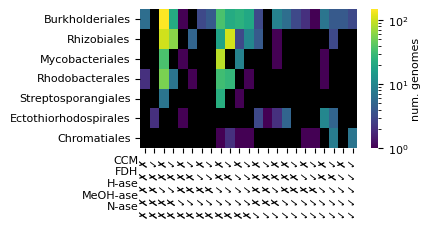

In [103]:
plt.figure(figsize=(3.5,1.8))

cmap = plt.cm.viridis.copy()
cmap.set_bad(color='k')
sns.heatmap(cts2plot, cmap=cmap, cbar=True, norm=LogNorm(), cbar_kws={'label': 'num. genomes'})
my_xticks = cts2plot.index.values
# find PCC-6307, replace with its only family Cyanobiaceae
my_xticks[my_xticks == 'PCC-6307'] = 'Cyanobiaceae'

my_yticks = cts2plot.index.values
# find PCC-6307, replace with its only family Cyanobiaceae
my_yticks[my_xticks == 'PCC-6307'] = 'Cyanobiaceae'
plt.yticks(np.arange(len(cts2plot.index)) + 0.5, my_yticks, rotation=0)

# use unicode check to represent TRUE and unicode X to represent false 
subs = lambda x: "\u2713" if x else "\u2717"
my_xticks = ['\n'.join(map(subs, c)) for c in cts2plot.columns.values]

plt.xticks(np.arange(len(cts2plot.columns)), my_xticks, ha='center')

# use unicode check to represent TRUE and unicode X to represent false 
subs = lambda x: "\u2713" if x else "\u2717"
my_xticks = [' '.join(map(subs, c[1:])) for c in cts2plot.columns.values]
plt.xticks(np.arange(len(cts2plot.columns)) + 0.5, my_xticks, ha='center', rotation=90)

cols2tabulate = ['CBB', 'csome', 'h2ase', 'fdh', 'meoh', 'n2ase']
contingency_table_label = '\n'.join('CCM,FDH,H-ase,MeOH-ase,N-ase'.split(','))
plt.figtext(0.12, 0.07, contingency_table_label, va='top', ha='right', size=8)
plt.xlabel('')
plt.ylabel('')
plt.savefig('../output/plots/heatmap.pdf', bbox_inches='tight')
plt.show()